In [ ]:
# Imports & Settings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
     
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_style('whitegrid')

# Load environment variables
from dotenv import load_dotenv
import os
from pathlib import Path

# Load .env file from general directory
env_path = Path('../../../general/.env')
load_dotenv(env_path)

In [ ]:
# Get path from environment variables
path_daily_returns_strategies = os.getenv('path_daily_returns_strategies')

# Full History for all the strategies
path = path_daily_returns_strategies

In [ ]:
# read csv file from path
df = pd.read_csv(path, sep=';') 

df.head()

In [ ]:
# df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            484 non-null    object 
 1   Profit_pct_100  484 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.7+ KB


In [ ]:
# Convert the Date column to string and slice to obtain year, month, and day values
df['Year'] = df['Date'].astype(str).str.slice(0, 4).astype(int)
df['Month'] = df['Date'].astype(str).str.slice(5, 7).astype(int)
df['Day'] = df['Date'].astype(str).str.slice(8, 10).astype(int)

# drop the Date column
df.drop(columns=['Date'], inplace=True)

# Convert the Year, Month, and Day columns to a single datetime column
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Drop the Year, Month, and Day columns as they are no longer needed
df.drop(columns=['Year', 'Month', 'Day'], inplace=True)

# rename the columns to Date and Profit (%)
df.rename(columns={'Profit_pct_100': 'Profit (%)'}, inplace=True)

# columns order
cols = ['Date', 'Profit (%)']

# Reorder the DataFrame columns
df = df[cols]

df.set_index('Date', inplace=True)

df.head()

,Profit (%)
Date,
2023-04-17,0.05
2023-04-18,-0.00
2023-04-19,-0.01
2023-04-20,-0.00
2023-04-21,0.01


In [ ]:
# daily_returns are a series as the Profit (%) column
daily_returns = df['Profit (%)']

daily_returns.head()

Date
2023-04-17    0.05
2023-04-18   -0.00
2023-04-19   -0.01
2023-04-20   -0.00
2023-04-21    0.01
Name: Profit (%), dtype: float64

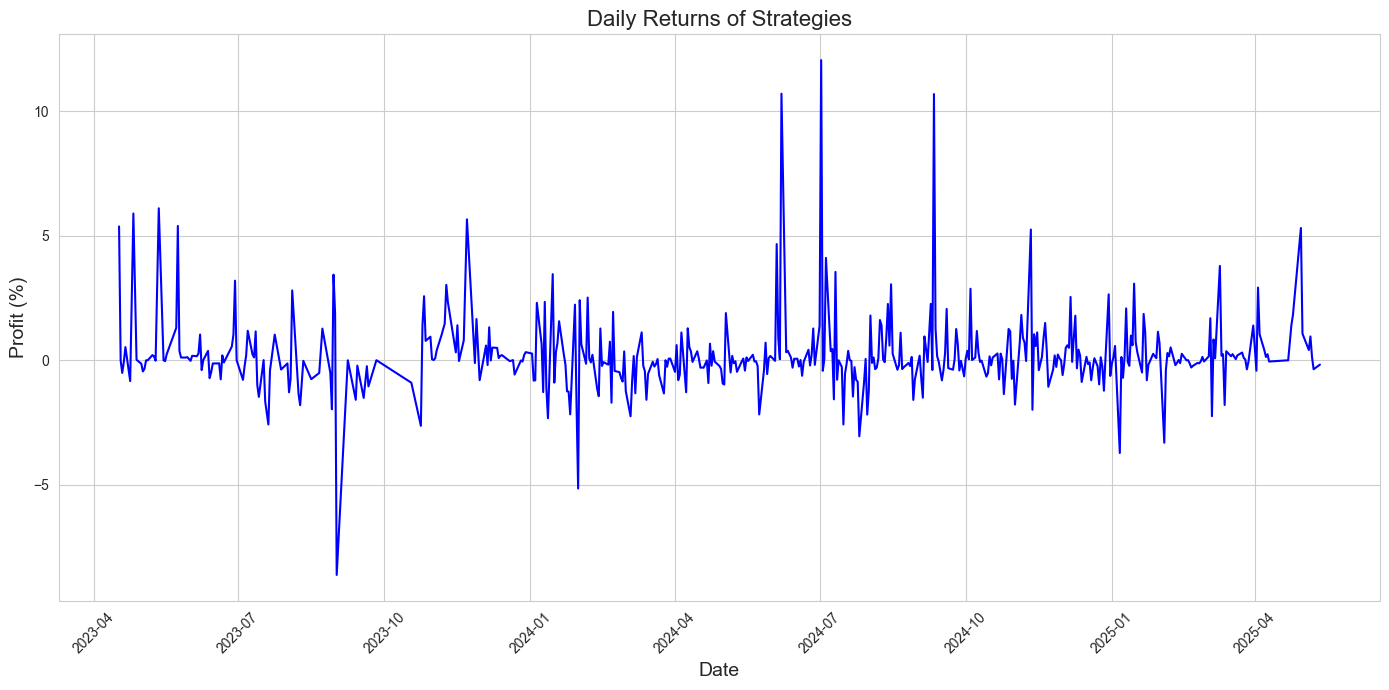

In [ ]:
# plot daily_returns
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_returns*100, color='blue', linewidth=1.5)
plt.title('Daily Returns of Strategies', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Profit (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Montecarlo Simulation

# Simulation parameters
num_simulations = 1000  # Number of simulations

forecast_days = 365  # Investment horizon in days
desired_return = 0.10  # Desired return (10%)

initial_investment = 100000  # Initial investment amount

# Initilize the simulation array with zeros
simulations = np.zeros((num_simulations, forecast_days))

# Simulate future path
for i in range(num_simulations):
    cumulative_returns = np.random.choice(daily_returns, size=forecast_days, replace=True).cumsum()
    simulations[i, :] = initial_investment * (1 + cumulative_returns)

print(simulations)

[[101034.97  100720.38   99589.26  ... 216878.81  215600.67  215766.72 ]
 [ 96276.03   95868.58   96226.    ... 147060.615 147038.655 148050.915]
 [102414.06  102414.1    98690.13  ... 161868.065 161941.925 162105.655]
 ...
 [ 99732.69  101629.31  101743.08  ... 182522.735 183683.855 183276.405]
 [ 98297.08   99988.3   102051.16  ... 178704.78  178750.68  178361.01 ]
 [ 99122.98   98501.72   98740.27  ... 161863.705 161354.705 160727.085]]


In [ ]:
type(simulations)

numpy.ndarray

In [ ]:
simulations.shape

(1000, 365)

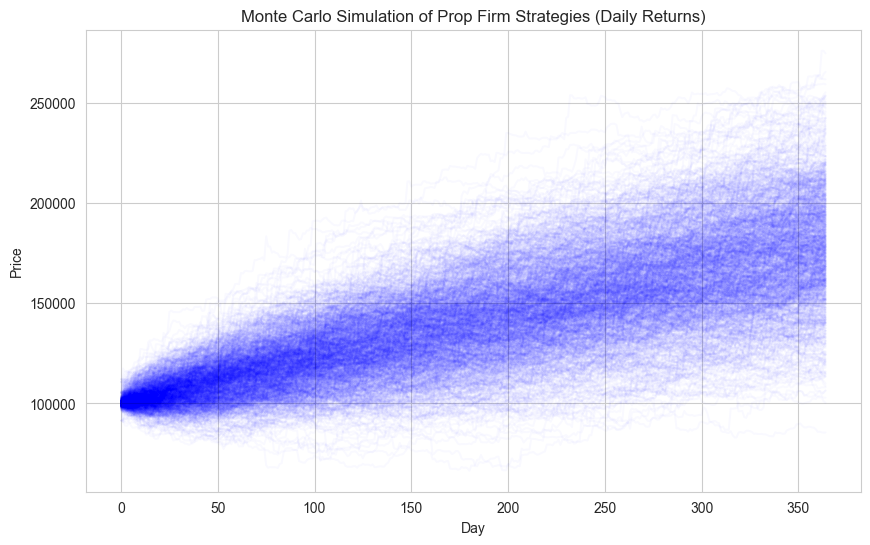

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(simulations.T, color="blue", alpha=0.025)
plt.title("Monte Carlo Simulation of Prop Firm Strategies (Daily Returns)")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()

In [ ]:
# Calculate the average daily return
average_daily_return = daily_returns.mean()

# Calculate volatility as the standard deviation of daily returns
volatility = daily_returns.std()

print(f"Average Daily Return: {average_daily_return}")
print(f"Volatility: {volatility}")

Average Daily Return: 0.002175112809917358
Volatility: 0.01577165658076654


In [ ]:
# Simulating future returns
simulated_end_returns = np.zeros(num_simulations)
for i in range(num_simulations):
    random_returns = np.random.normal(average_daily_return, volatility, forecast_days)
    cumulative_return = np.prod(1 + random_returns)
    simulated_end_returns[i] = initial_investment * cumulative_return

# Calculate the final investment values
final_investment_values = simulated_end_returns

print(final_investment_values)

[195257.36740388 201163.19825133 188102.29956973 158697.01362009
 216707.81539746 220704.49812434 245264.42099895 210821.7683997
 268774.71698998 140237.31424098 285210.26007122 160611.35391596
 332726.70028271 247619.7929067  327853.79381064 189868.66939911
 177001.0307226  226742.9043925  315564.64521945 208663.39095605
 203358.11336844 293128.64702302 121195.04107587 165934.59780264
 120716.10895657 447523.62950043 184407.00110719 206060.22559658
 142087.99244294 119342.6049967  133016.47234131 318082.09126924
 400700.74461069 208341.53272834 270787.84547306 198961.27239763
 163269.25220193 196009.27377318 145263.84529963 367031.11273106
 228701.3153652  320269.35255034 194203.7856445  389294.62126009
 249819.1887057  206945.61639979 171066.29152455 203516.29288755
 334581.82433606 212191.54079281 153353.73616345 184350.6170147
 242035.28037373 242783.66330406 282166.58709887 132540.91715473
 400699.55900428 242895.79651366 274023.88009544 199683.5946093
  78646.78391318 166969.4422

In [ ]:
confidence_level = 0.95
sorted_returns = np.sort(final_investment_values)
index_at_var = int((1-confidence_level) * num_simulations)
var = initial_investment - sorted_returns[index_at_var]
conditional_var = initial_investment - sorted_returns[:index_at_var].mean()

print(f"Value at Risk (95% confidence): ${var:,.2f}")
print(f"Expected Tail Loss (Conditional VaR): ${conditional_var:,.2f}")

Value at Risk (95% confidence): $-24,696.56
Expected Tail Loss (Conditional VaR): $-9,335.47


In [ ]:
desired_return = 0.10  # Desired return

num_success = np.sum(final_investment_values >= initial_investment * (1 + desired_return))
probability_of_success = num_success / num_simulations

print(f"Probability of achieving at least a {desired_return*100}% return: {probability_of_success*100:.2f}%")

Probability of achieving at least a 10.0% return: 97.60%


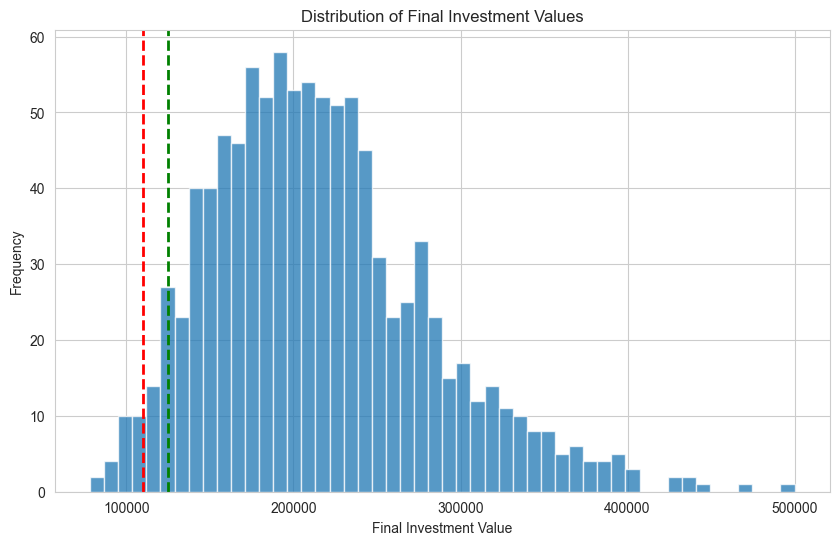

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(final_investment_values, bins=50, alpha=0.75)
plt.axvline(
    initial_investment * (1 + desired_return),
    color="r",
    linestyle="dashed",
    linewidth=2,
)
plt.axvline(initial_investment - var, color="g", linestyle="dashed", linewidth=2)
plt.title("Distribution of Final Investment Values")
plt.xlabel("Final Investment Value")
plt.ylabel("Frequency")
plt.show()